# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import*
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

from sklearn.linear_model import*
from sklearn.preprocessing import*
from sklearn.ensemble import*
from sklearn.neighbors import*

from xgboost import XGBRegressor

# The Data

In [2]:
df = pd.read_csv("/kaggle/input/nmims-m2-batch-1/train.csv")
test = pd.read_csv("/kaggle/input/nmims-m2-batch-1/test.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774 entries, 0 to 12773
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            12774 non-null  int64  
 1   Unnamed: 0.1  12774 non-null  int64  
 2   Date          12774 non-null  object 
 3   AveragePrice  12774 non-null  float64
 4   Total Volume  12774 non-null  float64
 5   4046          12774 non-null  float64
 6   4225          12774 non-null  float64
 7   4770          12774 non-null  float64
 8   Total Bags    12774 non-null  float64
 9   Small Bags    12774 non-null  float64
 10  Large Bags    12774 non-null  float64
 11  XLarge Bags   12774 non-null  float64
 12  type          12774 non-null  object 
 13  year          12774 non-null  int64  
 14  region        12774 non-null  object 
dtypes: float64(9), int64(3), object(3)
memory usage: 1.5+ MB


In [4]:
if df.isnull().sum().any() == False:
    print("No missing values")
else:
    print("Missing values present")

No missing values


In [5]:
print("number of duplicate rows: ", df.duplicated().sum())

number of duplicate rows:  0


In [6]:
df.describe()

,id,Unnamed: 0.1,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,12774.000000,12774.000000,12774.000000,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,1.277400e+04,12774.000000,12774.000000
mean,9146.982543,24.163300,1.412157,8.647452e+05,2.979368e+05,2.983547e+05,2.304099e+04,2.454102e+05,1.864018e+05,5.575951e+04,3248.891310,2016.157351
std,5271.942481,15.455538,0.405169,3.483427e+06,1.266719e+06,1.214340e+06,1.078313e+05,1.002990e+06,7.595630e+05,2.469235e+05,18592.733408,0.941810
min,0.000000,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,4575.250000,10.000000,1.100000,1.049451e+04,8.112575e+02,2.919310e+03,0.000000e+00,4.867440e+03,2.682582e+03,1.239900e+02,0.000000,2015.000000
50%,9192.500000,24.000000,1.380000,1.031261e+05,8.298080e+03,2.839996e+04,1.755050e+02,3.873202e+04,2.526108e+04,2.592220e+03,0.000000,2016.000000
75%,13724.750000,38.000000,1.670000,4.348257e+05,1.127869e+05,1.468455e+05,6.277283e+03,1.115474e+05,8.440231e+04,2.194152e+04,139.855000,2017.000000
max,18245.000000,52.000000,3.250000,6.250565e+07,2.162018e+07,2.044550e+07,1.993645e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


No missing values, no duplicates and no outliers

(Thank god) 


# Exploratory Data Analysis

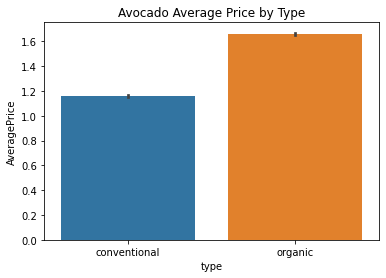

In [7]:
plt.figure()
plt.title("Avocado Average Price by Type")
sns.barplot(x="type",y="AveragePrice",data= df)
plt.show()

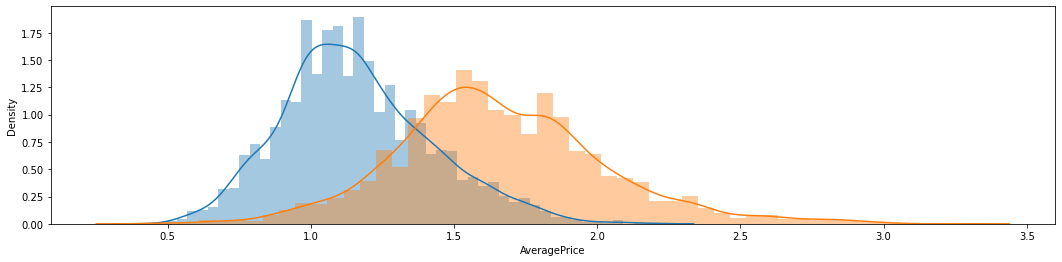

In [8]:
df_conventional = df[df['type'] == 'conventional']
df_organic = df[df['type'] == 'organic']
f, ax = plt.subplots(nrows=1, ncols=1, figsize=(18, 4))
sns.distplot(df_conventional['AveragePrice'])
sns.distplot(df_organic['AveragePrice'])
plt.show()

# Scaling and Preprocessing

In [9]:
X=df.drop('AveragePrice',1)
y=df['AveragePrice']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [10]:
scaler=LabelEncoder()
for col in X_train.columns:
    if df[col].dtype=='object':
        X_train[col]=scaler.fit_transform(X_train[col])
        X_test[col]=scaler.transform(X_test[col])
        test[col]=scaler.transform(test[col])

In [11]:
scaler=VarianceThreshold(0.1)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
test = scaler.transform(test)

In [12]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
test = scaler.transform(test)

# Training

In [13]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor(random_state=42)
etr.fit(X_train,y_train)

y_tr1_etr=etr.predict(X_train)
y_pr_etr=etr.predict(X_test)

print('train data accuracy :',etr.score(X_train,y_train))
print('test data accuracy :',etr.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr1_etr))
print('loss of test data :',mean_squared_error(y_test,y_pr_etr))

train data accuracy : 1.0
test data accuracy : 0.9031688624256102
loss of train data : 4.26892852745327e-30
loss of test data : 0.016378202939334636


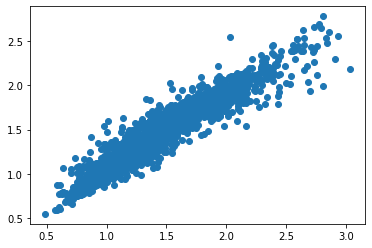

In [14]:
plt.scatter(x=y_test,y=y_pr_etr)

In [15]:
# The hyperparameters were found using GridSerchCV, since the run time was too long I didnt include it here
xgb = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=9,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=180, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)
xgb.fit(X_train, y_train)

y_tr2=xgb.predict(X_train)
y_pr2=xgb.predict(X_test)

print('train data accuracy :',xgb.score(X_train,y_train))
print('test data accuracy :',xgb.score(X_test,y_test))
print('loss of train data :',mean_squared_error(y_train,y_tr2))
print('loss of test data :',mean_squared_error(y_test,y_pr2))

train data accuracy : 0.9954492624281992
test data accuracy : 0.9149839926305433
loss of train data : 0.0007412359472017085
loss of test data : 0.014379769324915987


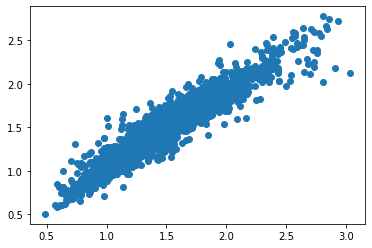

In [16]:
plt.scatter(x=y_test,y=y_pr2)

# Predictions

In [17]:
price_preds_etr = etr.predict(test)
price_preds_xgb = xgb.predict(test)

In [18]:
sub_etr = pd.read_csv('../input/sample-sbm/sample_submission.csv')
sub_etr['AveragePrice'] = price_preds_etr
sub_etr.to_csv('submission_etr.csv', index=False)

In [19]:
sub_xgb = pd.read_csv('../input/sample-sbm/sample_submission.csv')
sub_xgb['AveragePrice'] = price_preds_xgb
sub_xgb.to_csv('submission_xgb.csv', index=False)

# Ensembling

On submitting both the files, we got 0.084 MSE on xgboost and 0.090 on ETR. So we ensembled the results with weightage given according to the results obtained on the submissions

In [20]:
weight_model_paths_pairs = [
    (.575, '../input/best-subs/submission_xgb.csv'),
    (.425, '../input/best-subs/submission_etr.csv')
]

In [21]:
targets = ['AveragePrice']

submissions = []
for weight, path in weight_model_paths_pairs:
    df = pd.read_csv(path)
    df[targets] = df[targets] * weight
    submissions.append(df)

ensembled_output = pd.concat(submissions).groupby(['id']).sum().reset_index()

In [22]:
ensembled_output.to_csv('submission_ensemble_575_425.csv', index=False)